In [1]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [2]:
#|export
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from geopy.geocoders import Nominatim
import os,glob

from dementia_inequalities.tools.health_helpers import polygon_area 

In [3]:
N_intersections = 100

In [4]:
# population_data_path = 'data/LAD_populations/LAD_population2019.csv'
# QOF_data_path = 'data/QOF/qof_2019_20.csv'
# GP_catchment_areas_geo_path = 'data/GP_catchment_areas/eDecJan-Mar2020.geojson'
# LAD_geo_path = 'data/LAD_boundaries/Lower_Layer_Super_Output_Areas_Dec_2011/Lower_Layer_Super_Output_Areas_(December_2011)_Boundaries_Generalised_Clipped_(BGC)_EW_V3.shp'

In [5]:
# Load geojson files of boundaries
gdf_LAD = gpd.read_file(const.data_path+'/LAD_area/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
#LAD_data.to_crs(epsg=4326, inplace=True)

gdf_catchment = gpd.read_file(const.data_path+'/Catchment Area/A81001.geojson')
for filename in glob.glob(os.path.join(const.data_path+'/Catchment Area/', '*.geojson')):
  gdf_catchment = pd.concat([gdf_catchment, gpd.read_file(filename)])

gdf_catchment = gdf_catchment.to_crs(epsg=3857)
gdf_LAD = gdf_LAD.to_crs(epsg=3857)



In [ ]:
gdf_catchment.rename(columns={'name': 'Name'}, inplace=True)
# get rid of those whose surgeries are un-named
gdf_catchment = gdf_catchment[gdf_catchment['Name'].notna()]

# tidy gp catchment area dataframe 
gdf_catchment.reset_index(inplace=True)


Remove the worst data entry errors in the GP catchment areas 

In [ ]:
areas = []
areas_with_index = []
for i in range(len(gdf_catchment['geometry'])):
    area = polygon_area(gdf_catchment['geometry'][i])
    areas.append(area)
    areas_with_index.append( (i, area) )
areas_with_index.sort(key=lambda d: d[1])

gdf_catchment['area'] = areas

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
catchment_to_remove = []
for i, area in areas_with_index[-10:]:
    name = gdf_catchment.iloc[i].Name
    print('(%s) %s: %se9' % (i, name, np.round(area/1e9,2)))
    catchment_to_remove.append(i)

(7484) P86014 - DR IK BABAR: 587723.9e9
(7826) H82078 - SOUTHBOURNE SURGERY: 587723.9e9
(7263) L82015 -: 591219.76e9
(810) G82086 - THE NEW SURGERY: 635632.94e9
(4390) L82001 - LANDER MEDICAL PRACTICE: 635632.94e9
(5093) E84653 - ZAIN MEDICAL CENTRE: 751792.51e9
(4447) E85015 - HOUNSLOW MEDICAL CENTRE: 798453.02e9
(6828) A83011 - CLAYPATH and UNIVERSITY MEDICAL GROUP: 801778.95e9
(8484) J82183 -: 946497.86e9
(3080) K84014 - MORLAND HOUSE SURGERY: 1183545.61e9


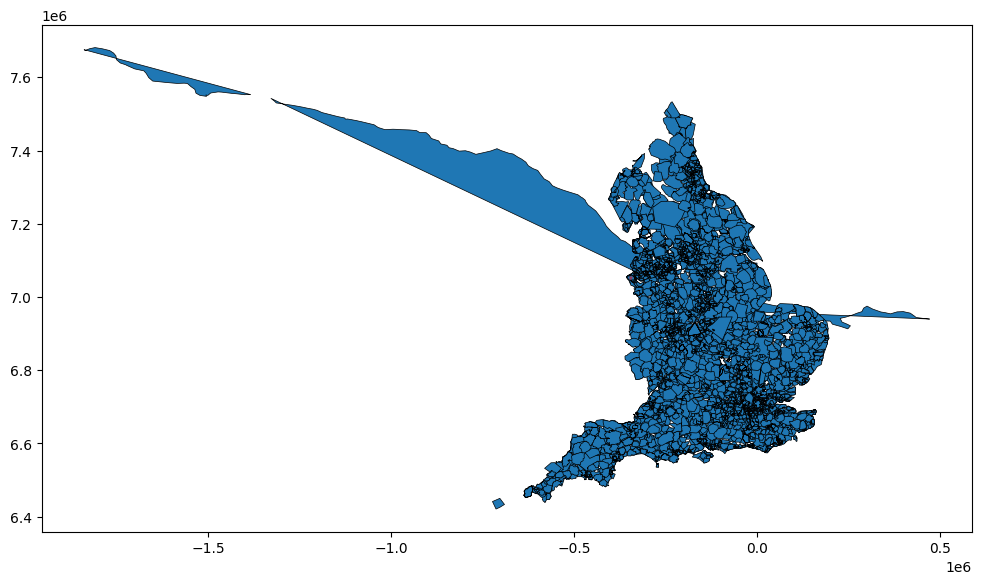

In [ ]:
i = areas_with_index[-7][0]
fig, ax = plt.subplots(figsize=(12,10))
gdf_catchment.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=1.0)
#gdf_catchment.loc[[7998],'geometry'].plot(ax=ax, color='red', alpha=0.5)
plt.show()

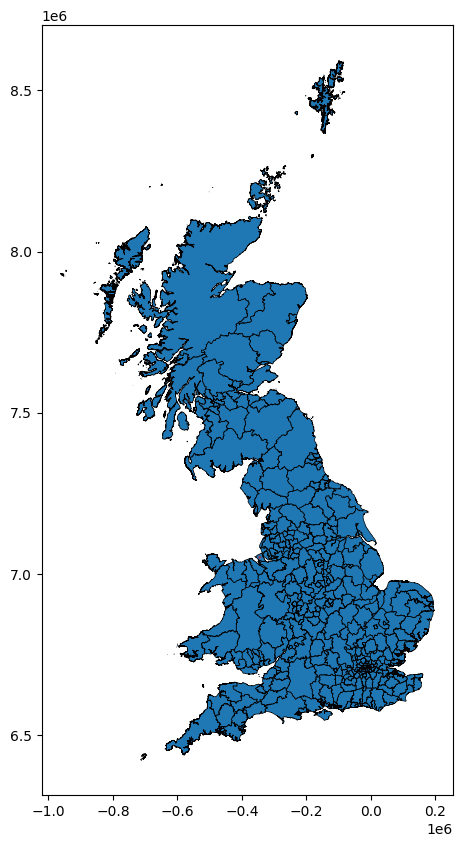

In [ ]:
# i = areas_with_index[-7][0]
# fig, ax = plt.subplots(figsize=(12,10))
# gdf_LAD.plot(ax=ax, edgecolor='black', linewidth=0.5, alpha=1.0)
# gdf_catchment.loc[[7998],'geometry'].plot(ax=ax, color='red', alpha=0.5)
# plt.show()

In [ ]:
gdf_LAD[gdf_LAD['LAD21NM']== 'North Norfolk']

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
168,169,E07000147,North Norfolk,,611076,330857,1.132099,52.83389,c23f6ae9-976e-4770-a856-b9471287059d,"MULTIPOLYGON (((168500.987 6924331.225, 168479..."


In [ ]:
gdf_catchment = gdf_catchment.to_crs(epsg=3857)
gdf_LAD = gdf_LAD.to_crs(epsg=3857)

In [ ]:
#gpd.overlay(gdf_LAD[gdf_LAD['LAD21NM']== 'North Norfolk'], gdf_catchment, how='intersection')['Name']

0                               D82066 - PASTON SURGERY
1                        D82004 - CROMER GROUP PRACTICE
2                        D82049 - LITCHAM HEALTH CENTRE
3                   D82059 - BIRCHWOOD MEDICAL PRACTICE
4                               LANCELOT MEDICAL CENTRE
5                  D82005 - SHERINGHAM MEDICAL PRACTICE
6                    D82058 - COASTAL VILLAGES PRACTICE
7                       D82030001 - DR KELLY & PARTNERS
8                          D82038 - WELLS HEALTH CENTRE
9                     D82104 - ACLE MEDICAL PARTNERSHIP
10                    D82053 - MUNDESLEY MEDICAL CENTRE
11                    D82053 - MUNDESLEY MEDICAL CENTRE
12                    D82053 - MUNDESLEY MEDICAL CENTRE
13                    D82053 - MUNDESLEY MEDICAL CENTRE
14                    D82053 - MUNDESLEY MEDICAL CENTRE
15                    D82053 - MUNDESLEY MEDICAL CENTRE
16                    D82053 - MUNDESLEY MEDICAL CENTRE
17                          D82628 - ALDBOROUGH 

In [ ]:
gdf_catchment = gdf_catchment.drop(catchment_to_remove)
gdf_catchment.plot(edgecolor='black', linewidth=0.5)

KeyError: '[3080, 8484, 6828, 4447] not found in axis'

**Note to Bea** That GP catchment area off the end of cornwall is fine - you forgot the Isles of Scilly... 

In [18]:
population_data_path = const.output_path + '/LAD_age_2021.csv'
df_pop = pd.read_csv(population_data_path)
df_pop = df_pop[['LAD_name', 'all_age']]

In [19]:
# df_pop = pd.read_csv(population_data_path)
# df_QOF = pd.read_csv(QOF_data_path)
# gdf_catchment = gpd.read_file(GP_catchment_areas_geo_path)
# gdf_LAD = gpd.read_file(LAD_geo_path)

In [20]:
# Change to lon lat
gdf_LAD = gdf_LAD.to_crs(epsg=4326)
# Remove Wales
gdf_LAD = gdf_LAD.drop(gdf_LAD[gdf_LAD['LAD21CD'].str.startswith('W')].index)
# Add population
gdf_LAD = gdf_LAD.merge(df_pop, left_on='LAD21NM', right_on='LAD_name')

In [21]:
# # Merge with QOF data to ensure that we don't use GPs that have no QOF data
# unmerged_gdf_catchment = gdf_catchment
# gdf_catchment = unmerged_gdf_catchment.merge(df_QOF, left_on='ODSCode', right_on='pcode')

In [22]:
merc_gdf_catchment = gdf_catchment.to_crs(epsg=3857)
merc_gdf_LAD = gdf_LAD.to_crs(epsg=3857)

Compute intersections $A_{ik}$ between LADs $i$ and GP $k$ catchment areas. 

In [23]:
# Compute intersections between LADs and GP catchment areas

LAD_GP_catchment_area_interesections = []

GP_xs = np.array(merc_gdf_catchment['geometry'].centroid.x)
GP_ys = np.array(merc_gdf_catchment['geometry'].centroid.y)

for i, LAD_row in merc_gdf_LAD.iterrows():
    print('LAD %s/%s' % (i+1, merc_gdf_LAD.shape[0]), end='\r')
    
    LAD_center = LAD_row.geometry.centroid
    dx = GP_xs - LAD_center.x
    dy = GP_ys - LAD_center.y
    dists = np.sqrt(dx**2 + dy**2)
    #closest_GPs = merc_gdf_catchment.index[dists.argsort()[:N_intersections]]
    closest_GPs = merc_gdf_catchment.index[dists.argsort()[:2]]
    
    inters = []

    for j in closest_GPs:
        inter = merc_gdf_catchment.loc[j].geometry.buffer(0).intersection(LAD_row.geometry)
        inters.append(inter)

    gdf_inters = gpd.GeoDataFrame({ 'geometry' : inters })
    gdf_inters.crs = {'init': 'epsg:3857', 'no_defs': True}
    gdf_inters = gdf_inters.to_crs(epsg=4326)

    _intersection_areas = []
    
    for k, j in enumerate(closest_GPs):
        inter = inters[k]
        if inter.area != 0:
            _intersection_areas.append([j, polygon_area(inter)])
            
    LAD_GP_catchment_area_interesections.append(_intersection_areas)

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/bea/miniconda3/envs/adu_env_dementia_ineq/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax 

See which LADs fall outside of catchment areas

<Axes: >

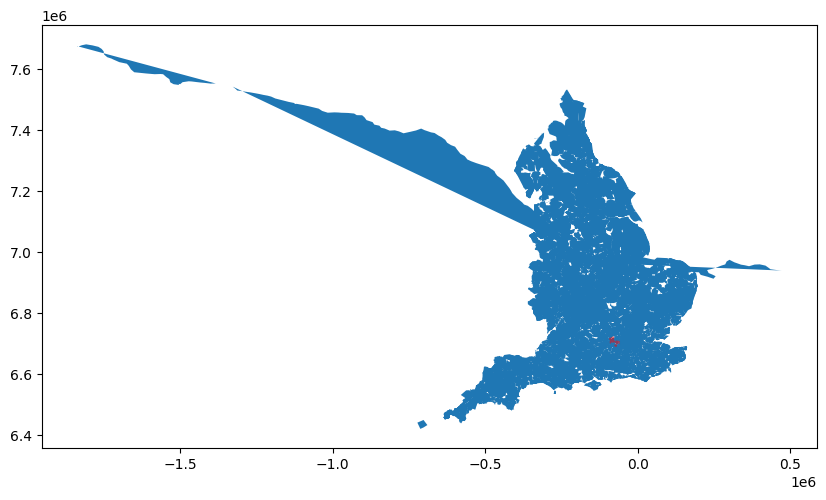

In [24]:
LADs_with_no_GPs = []
for i in range(len(LAD_GP_catchment_area_interesections)):
    if len(LAD_GP_catchment_area_interesections[i]) == 0:
        LAD_i = merc_gdf_LAD.index[i]
        LADs_with_no_GPs.append(LAD_i)
      
fig, ax = plt.subplots(figsize=(10,10))
merc_gdf_catchment.plot(ax=ax)
merc_gdf_LAD.loc[LADs_with_no_GPs,'geometry'].plot(ax=ax, color='red', alpha=0.5)

Compute the population $I_{ik}$ of the intersection of LAD $i$ and GP $k$

In [25]:
j = 0
for i, LAD_row in gdf_LAD.iterrows():
    intersection_data = LAD_GP_catchment_area_interesections[j]; j += 1
    LAD_area = polygon_area(LAD_row['geometry'])
    
    for k in range(len(intersection_data)):
        GP_i = intersection_data[k][0]
        int_area = intersection_data[k][1]
        int_pop = (int_area / LAD_area) * LAD_row['pop']
        intersection_data[k].append(int_pop)

KeyError: 'pop'

Save data

In [ ]:
LAD_GP_catchment_area_interesections = np.array(LAD_GP_catchment_area_interesections, dtype=object)
np.save('data/LAD_GP_intersections/LAD_GP_intersections_2020.npy', LAD_GP_catchment_area_interesections)